Find the variable affecting the loan default rate

In [127]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/dilipprasad/LoanRiskAssesment/master/loan-dataset-1-clean.csv")

In [128]:
#Perform quick validation 

if df.duplicated().any():
    print('There are', df.duplicated().sum(), 'duplicate rows in the DataFrame\n')
else:
    print('There are no duplicate rows in the DataFrame\n')
    
#Check if there are NaN in the df   
if df.isna().any().any():
    print('There are NaN values in the DataFrame')
    print(df.isna().any(axis=0)[df.isna().any()], '\n')
else:
    print('There are no NaN values in the DataFrame\n')    

There are no duplicate rows in the DataFrame

There are no NaN values in the DataFrame



In [129]:
df.head()

,loan_id,principal_loan_amount,request_date,interest_rate,loan_channel,is_approved,is_default,customer_monthly_income,customer_age,customer_gender,customer_credit_score,customer_zip_code
0,70280c1b-4339-4949-ba69-ad2a6cb6b782,8880,2023-03-06,9.0,WEB,False,False,6100,30,M,3,10007
1,8a550559-9749-491b-b6aa-7188bc0a488f,13720,2023-05-10,10.0,MOBILE_APP,False,False,5150,39,F,3,10004
2,5644d27e-e05e-4a40-bef3-64187892338f,2090,2023-02-16,7.5,AGENT,False,False,6030,43,F,3,10003
3,9d8d17ac-8af9-4936-ba5d-8d5ed5e0cfab,6820,2023-02-26,8.5,MOBILE_APP,False,False,2150,54,M,0,10004
4,4586ad7a-2231-419b-b8e3-ba03b929b56e,13770,2023-04-13,10.0,AFFILIATE,False,False,5810,28,F,2,10007


In [130]:
df.describe()

,principal_loan_amount,interest_rate,customer_monthly_income,customer_age,customer_credit_score,customer_zip_code
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8074.066000,8.853000,4253.235333,41.075600,3.442267,10005.836267
std,4052.892796,0.814781,1303.524409,11.204475,1.367866,2.098544
min,1000.000000,7.500000,2000.000000,22.000000,0.000000,10001.000000
25%,4550.000000,8.000000,3120.000000,31.000000,3.000000,10004.000000
50%,8110.000000,9.000000,4255.000000,41.000000,4.000000,10006.000000
75%,11590.000000,9.500000,5390.000000,51.000000,5.000000,10008.000000
max,15000.000000,10.000000,6500.000000,60.000000,5.000000,10009.000000


Start of Null hypothesis to confirm that  Default column is NOT affected by interest rate

In [131]:
#Find median (Sort in ascending order and take the item in the center - ( (num of items/2) + 1) / 2)
median = df['interest_rate'].median()
print("Median value:", median)


Median value: 9.0


In [132]:
#Seggregate and find high and low interest rate 
high_interest = df[df['interest_rate'] > median]
low_interest = df[df['interest_rate'] <= median]


In [133]:
high_interest.shape

(5434, 12)

In [134]:
low_interest.shape

(9566, 12)

In [135]:
low_interest['is_default']

0        False
2        False
3        False
5        False
7        False
         ...  
14992    False
14993    False
14994    False
14995    False
14998    False
Name: is_default, Length: 9566, dtype: bool

In [136]:
#The hypothesis is to find the relationship between interest rate and default rate. 
#Below we are Calculating the default rate's average (mean) for both interest rate groups.
#Mean = sum of all numbers / number of items

high_default_rate = high_interest['is_default'].mean()
low_default_rate = low_interest['is_default'].mean()

print("high_default_rate :",high_default_rate)
print("low_default_rate :",low_default_rate)


high_default_rate : 0.0
low_default_rate : 0.0


In [137]:
high_default_rate

0.0

In [138]:
low_default_rate

0.0

In [139]:
# Default rate of loans with high interest rates versus the default rate of loans with low interest rates, 
#based on is_default column

import scipy.stats as stats

t_stat, p_val = stats.ttest_ind(high_interest['is_default'], low_interest['is_default'])

print('t_stat - measures difference: ',t_stat)
print('p_val tells how strong against null hypothesis:',p_val)

t_stat - measures difference:  nan
p_val tells how strong against null hypothesis: nan


In [140]:
print('High interest rate default rate: {:.2%}'.format(high_default_rate))
print('Low interest rate default rate: {:.2%}'.format(low_default_rate))
print('Two-tailed t-test: t-statistic = {:.2f}, p-value = {:.2f}'.format(t_stat, p_val))

High interest rate default rate: 0.00%
Low interest rate default rate: 0.00%
Two-tailed t-test: t-statistic = nan, p-value = nan


Since both are 0, the interest rate has no significant impact on loan default rate.
The null hypothesis (the interest rate has no impact on the loan default rate) is true

------------------------------------------------------------------

Start of Null hypothesis to confirm that  Approval column is NOT affected by Income

In [141]:
df.head()

,loan_id,principal_loan_amount,request_date,interest_rate,loan_channel,is_approved,is_default,customer_monthly_income,customer_age,customer_gender,customer_credit_score,customer_zip_code
0,70280c1b-4339-4949-ba69-ad2a6cb6b782,8880,2023-03-06,9.0,WEB,False,False,6100,30,M,3,10007
1,8a550559-9749-491b-b6aa-7188bc0a488f,13720,2023-05-10,10.0,MOBILE_APP,False,False,5150,39,F,3,10004
2,5644d27e-e05e-4a40-bef3-64187892338f,2090,2023-02-16,7.5,AGENT,False,False,6030,43,F,3,10003
3,9d8d17ac-8af9-4936-ba5d-8d5ed5e0cfab,6820,2023-02-26,8.5,MOBILE_APP,False,False,2150,54,M,0,10004
4,4586ad7a-2231-419b-b8e3-ba03b929b56e,13770,2023-04-13,10.0,AFFILIATE,False,False,5810,28,F,2,10007


In [142]:
median = df['customer_monthly_income'].median()
print("Median value:", median)

Median value: 4255.0


In [143]:
#Seggregate and find high and low income
high_income = df[df['customer_monthly_income'] > median]
low_income = df[df['customer_monthly_income'] <= median]

In [144]:
#The hypothesis is to find the relationship between interest rate and default rate. 
#Below we are Calculating the default rate's average (mean) for both interest rate groups.
#Mean = sum of all numbers / number of items

high_approve_rate = high_interest['is_approved'].mean()
low_approve_rate = low_interest['is_approved'].mean()

print("high_income_rate :",high_approve_rate)
print("low_income_rate :",low_approve_rate)


high_income_rate : 0.0
low_income_rate : 0.0


In [145]:
high_income.shape

(7500, 12)

In [146]:
low_income.shape

(7500, 12)

In [147]:

import scipy.stats as stats

t_stat, p_val = stats.ttest_ind(high_income['is_approved'], low_income['is_approved'])

print('t_stat - measures difference: ',t_stat)
print('p_val tells how strong against null hypothesis:',p_val)

t_stat - measures difference:  nan
p_val tells how strong against null hypothesis: nan


In [148]:
print('High income rate default rate: {:.2%}'.format(high_approve_rate))
print('Low income rate default rate: {:.2%}'.format(low_approve_rate))
print('Two-tailed t-test: t-statistic = {:.2f}, p-value = {:.2f}'.format(t_stat, p_val))

High income rate default rate: 0.00%
Low income rate default rate: 0.00%
Two-tailed t-test: t-statistic = nan, p-value = nan


In [ ]:
Since both are 0, the interest rate has no significant impact on loan default rate.
The null hypothesis (the interest rate has no impact on the loan default rate) is true

=================================================================================

We proved our point that Loan default is not dependent on Interest and also Loan Approval rate is not dependend on salary


=====================================================================================

In [166]:
df["is_default"].unique()

array([0])

In [159]:

df_prep = df
df_prep["is_approved"] = df_prep["is_approved"].replace({False: 0, True: 1})
df_prep["is_default"] = df_prep["is_default"].replace({False: 0, True: 1})

df_prep.head()

,loan_id,principal_loan_amount,request_date,interest_rate,loan_channel,is_approved,is_default,customer_monthly_income,customer_age,customer_gender,customer_credit_score,customer_zip_code
0,70280c1b-4339-4949-ba69-ad2a6cb6b782,8880,2023-03-06,9.0,WEB,0,0,6100,30,M,3,10007
1,8a550559-9749-491b-b6aa-7188bc0a488f,13720,2023-05-10,10.0,MOBILE_APP,0,0,5150,39,F,3,10004
2,5644d27e-e05e-4a40-bef3-64187892338f,2090,2023-02-16,7.5,AGENT,0,0,6030,43,F,3,10003
3,9d8d17ac-8af9-4936-ba5d-8d5ed5e0cfab,6820,2023-02-26,8.5,MOBILE_APP,0,0,2150,54,M,0,10004
4,4586ad7a-2231-419b-b8e3-ba03b929b56e,13770,2023-04-13,10.0,AFFILIATE,0,0,5810,28,F,2,10007


In [164]:
df_prep["is_approved"].unique()


array([0])

In [165]:
df_prep["is_default"].unique()

array([0])

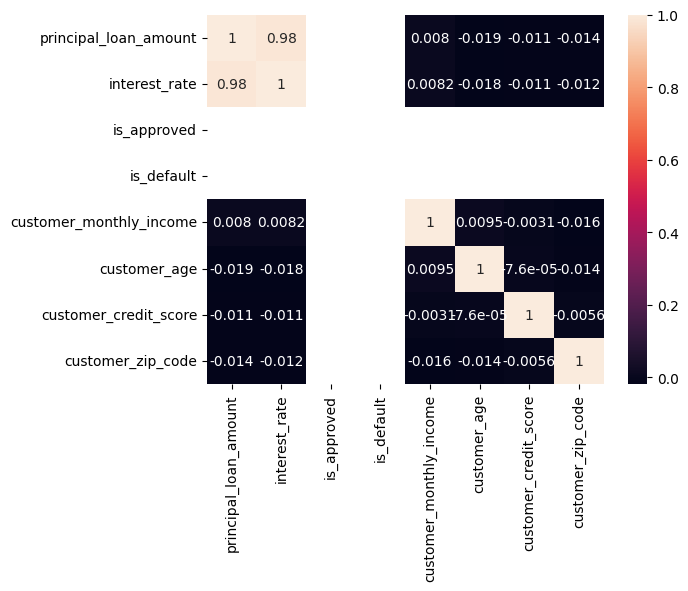

In [157]:
import seaborn as sns

# checking correlation using heatmap
#plotting the heatmap for correlation
ax = sns.heatmap(df_prep.corr(), annot=True)

So far could not find and relation

As per the excercise-  need to find out possible variable(s) that affect loan default rate
The risk team suggested the following variable possibilities:
customer_monthly_income
customer_zip_code

In [170]:
import pandas as pd
import statsmodels.api as sm

#Let's use regression test against data to find out whether the risk team's suggestion is correct.

X = df[['customer_monthly_income', 'customer_zip_code']]
#X = sm.add_constant(X)
y = df['is_default']
model = sm.Logit(y, X).fit()
print(model.summary())

PerfectSeparationError: Perfect separation detected, results not available

array([1.])